#  Exploring Cross-Validation, Overfitting, and Underfitting

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configure plots
sns.set(style="whitegrid")

### Load Data

In [6]:
# Load Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Cross-Validation

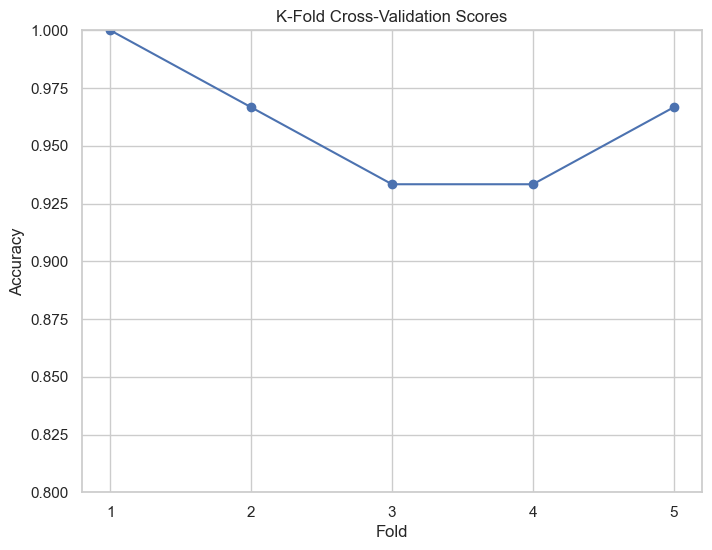

Cross-Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean CV Accuracy: 0.96


In [9]:
# Initialize model
model = RandomForestClassifier(random_state=42)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o')
plt.title('K-Fold Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(range(1, 6))
plt.show()

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")

### Overfitting

In [12]:
# Create a complex model to demonstrate overfitting
complex_model = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42)
complex_model.fit(X_train, y_train)

# Training accuracy
train_accuracy = accuracy_score(y_train, complex_model.predict(X_train))
# Test accuracy
test_accuracy = accuracy_score(y_test, complex_model.predict(X_test))

print(f"Training Accuracy (Overfitting Example): {train_accuracy:.2f}")
print(f"Test Accuracy (Overfitting Example): {test_accuracy:.2f}")

Training Accuracy (Overfitting Example): 1.00
Test Accuracy (Overfitting Example): 1.00


### Underfitting

In [15]:
# Create a simple model to demonstrate underfitting
simple_model = LogisticRegression(max_iter=100, random_state=42)
simple_model.fit(X_train, y_train)

# Training accuracy
train_accuracy_underfit = accuracy_score(y_train, simple_model.predict(X_train))
# Test accuracy
test_accuracy_underfit = accuracy_score(y_test, simple_model.predict(X_test))

print(f"Training Accuracy (Underfitting Example): {train_accuracy_underfit:.2f}")
print(f"Test Accuracy (Underfitting Example): {test_accuracy_underfit:.2f}")

Training Accuracy (Underfitting Example): 0.96
Test Accuracy (Underfitting Example): 1.00


### Visualizing Overfitting vs. Underfitting

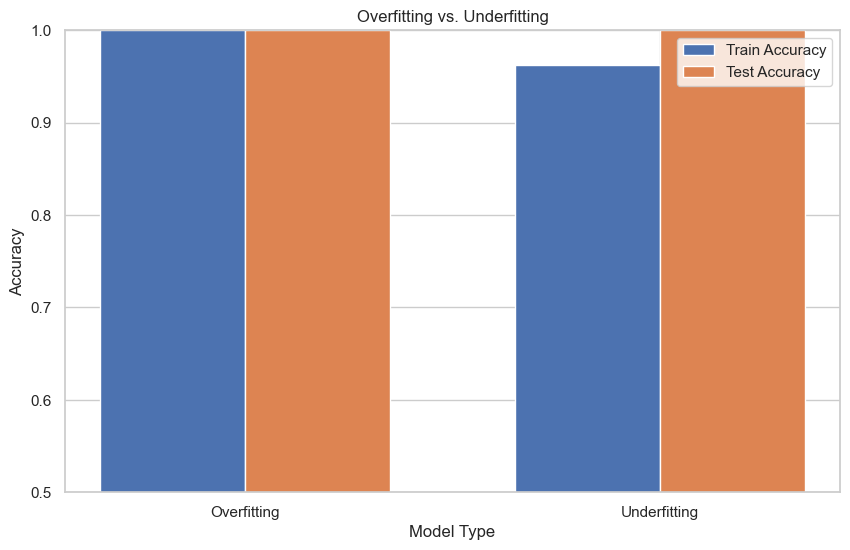

In [18]:
# Plot accuracies
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(2)

train_scores = [train_accuracy, train_accuracy_underfit]
test_scores = [test_accuracy, test_accuracy_underfit]

plt.bar(index, train_scores, bar_width, label='Train Accuracy')
plt.bar(index + bar_width, test_scores, bar_width, label='Test Accuracy')

plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.title('Overfitting vs. Underfitting')
plt.xticks(index + bar_width / 2, ('Overfitting', 'Underfitting'))
plt.ylim(0.5, 1.0)
plt.legend()

plt.show()

### Classification Report

In [21]:
# Evaluate model performance using a classification report
y_pred_complex = complex_model.predict(X_test)
y_pred_simple = simple_model.predict(X_test)

print("Classification Report (Complex Model):")
print(classification_report(y_test, y_pred_complex, target_names=data.target_names))

print("\nClassification Report (Simple Model):")
print(classification_report(y_test, y_pred_simple, target_names=data.target_names))

Classification Report (Complex Model):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Classification Report (Simple Model):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

